<a href="https://colab.research.google.com/github/yrodriguezmd/IceVision_in_the_works/blob/main/IV_pilot5tryfixbox_Sept28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

--2021-09-28 15:04:21--  https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1244 (1.2K) [text/plain]
Saving to: ‘install_colab.sh’

install_colab.sh    100%[===================>]   1.21K  --.-KB/s    in 0s      

2021-09-28 15:04:21 (38.6 MB/s) - ‘install_colab.sh’ saved [1244/1244]

Installing icevision + dependencices for CUDA 10
Uninstalling some dependencies to prevent errors
Found existing installation: torchvision 0.10.0+cu102
Uninstalling torchvision-0.10.0+cu102:
  Successfully uninstalled torchvision-0.10.0+cu102
Found existing installation: fastai 1.0.61
Uninstalling fastai-1.0.61:
  Successfully uninstalled fastai-1.0.61
Installing some dependencies to prevent errors
     |██

In [ ]:
from icevision.all import *

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:70
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

In [ ]:
import icevision
print('icevision v',icevision.__version__)
print('torch v',torch.__version__)
print('torchvision v',torchvision.__version__)

icevision v 0.9.0a1
torch v 1.8.0+cu101
torchvision v 0.9.0+cu101


In [ ]:
#option 1: git clone
#!git clone https://github.com/yrodriguezmd/sci5_kni5_cvat.git
# initially run with no File9, later added

#option 2:
#colab upload

In [29]:
!ls

'=5.1'	 checkpoints   install_colab.sh   pilot3   sample_data	 sci5_kni5_cvat


In [224]:
#!ls sci5_kni5_cvat/
!ls pilot5

conv_.json     File00007.jpg  File00009.jpg
File00003.jpg  File00008.jpg  File00010.JPG


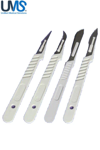

In [225]:
image_path = Path('pilot5')
## images better in a folder
img_files = get_image_files(image_path)

img = PIL.Image.open(img_files[0])
img = img.convert('RGB')

img.to_thumb(150,150)

In [200]:
# using model pretrained on coco
CLASSES = ('person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
               'train', 'truck', 'boat', 'traffic light', 'fire hydrant',
               'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog',
               'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
               'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
               'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
               'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
               'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
               'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
               'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
               'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop',
               'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
               'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush')
class_map = ClassMap(CLASSES)
len(class_map)
# 80 + background

81

In [201]:
print(class_map.get_by_name('knife'))
print(class_map.get_by_name('scissors'))

44
77


In [202]:
from icevision.models.checkpoint import *

In [203]:
model_type = models.mmdet.retinanet
backbone = model_type.backbones.resnet50_fpn_1x

In [204]:
model = model_type.model(backbone=backbone(pretrained=True), num_classes=len(class_map),)# **extra_args) 


/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader


In [205]:
backbone.__dict__

# filename diff on website, file down/uploaded
#retinanet_r50_caffe_fpn_1x_coco_20200531-f11027c5.pth

{'config_path': Path('/root/.icevision/mmdetection_configs/mmdetection_configs-2.10.0/configs/retinanet/retinanet_r50_fpn_1x_coco.py'),
 'model_name': 'retinanet',
 'pretrained': True,
 'weights_url': 'http://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_r50_fpn_1x_coco/retinanet_r50_fpn_1x_coco_20200130-c2398f9e.pth'}

In [226]:
model.eval()

imgs_array = [PIL.Image.open(file) for file in img_files]

imgs_array = [image.convert('RGB') for image in imgs_array]

img_size = 384 
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(img_size), tfms.A.Normalize()])

infer_ds = Dataset.from_images(imgs_array, valid_tfms, class_map = class_map)##

In [227]:
len(imgs_array)
##images in Dataset

5

In [208]:
#samples = [infer_ds[0] for _ in range(3)]
#show_samples(samples, denormalize_fn = denormalize_imagenet, ncols=3)

In [228]:
infer_dl = model_type.infer_dl(infer_ds, )#batch_size=4, shuffle=False)

#https://github.com/airctic/icevision/blob/9abbb09f47e6fc18867a5aa662885b558af2975c/icevision/models/mmdet/common/bbox/prediction.py
#preds_saved = model_type.predict_from_dl(model, infer_dl, keep_images=True)
## default detection threshold 0.5

In [229]:
preds_saved = model_type.predict_from_dl(model, infer_dl,
                                          keep_images=True,
                                          detection_threshold = 0.53) ##

  0%|          | 0/5 [00:00<?, ?it/s]

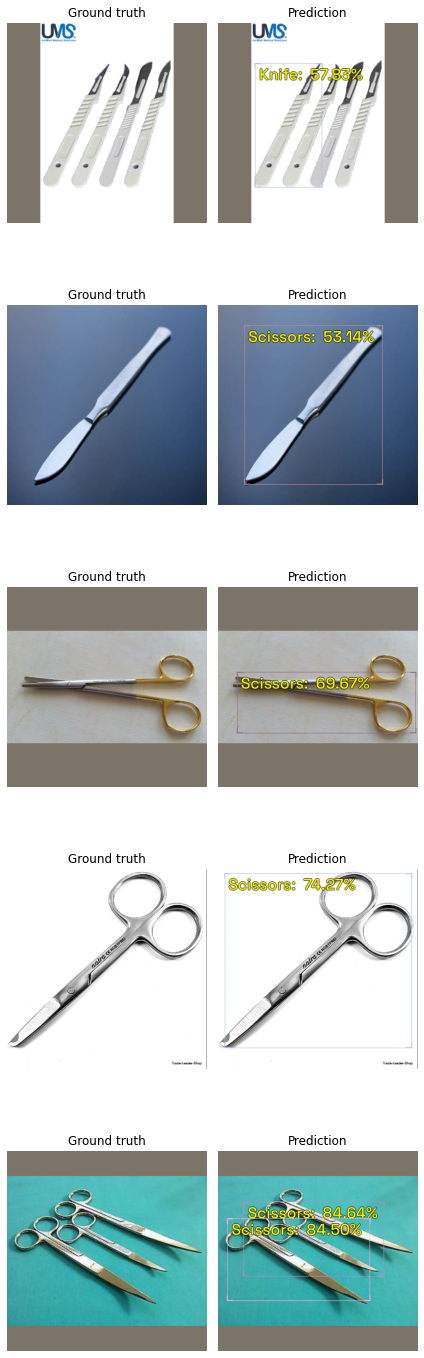

In [230]:
# with higher detection threshold at 0.53,
# all are annotated
show_preds(preds_saved, font_size=30, label_color='#ffff00')
#https://github.com/airctic/icevision/blob/9abbb09f47e6fc18867a5aa662885b558af2975c/icevision/models/mmdet/common/bbox/prediction.py

In [231]:
#preds_saved

In [232]:
preds_saved[0].pred
# alt: preds_saved[1].pred.as_dict
## bboxes in xmin, ymin, xmax, ymax
## no filepath, 
## not equal-sized array
# --> not optimal to use for csv formatting

BaseRecord

common: 
	- Record ID: 0
	- Image size ImgSize(width=384, height=384)
	- Img: 384x384x3 <np.ndarray> Image
detection: 
	- BBoxes: [<BBox (xmin:71.59517669677734, ymin:77.58869934082031, xmax:199.77194213867188, ymax:315.3489990234375)>]
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana': 47, 'apple': 48, 'sandwic

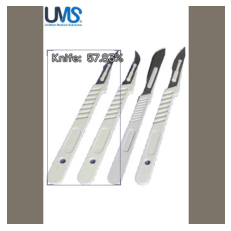

In [233]:
show_sample(preds_saved[0])

In [234]:
# adjusting base record to incorporate filepath
#https://github.com/airctic/icevision/blob/e60c2e2117c012ca5c323088f8577935a87c4f4e/icevision/core/record_components.py
for pred in preds_saved:
  pred.add_component(FilepathRecordComponent())

In [235]:
# adding the filepath for each file after adjusting baserecord
for _ in range(len(preds_saved)):
  preds_saved[_].set_filepath(img_files[_])

In [236]:
conv = convert_preds_to_coco_style(preds_saved)
conv
## bboxes in xmin(x top left), ymin (y top left), w, h
# same as convert_records_to_coco_style(preds_saved)
# https://github.com/airctic/icevision/blob/master/icevision/data/convert_records_to_coco_style.py#L78
# https://github.com/pytorch/vision/blob/master/references/detection/coco_utils.py

{'annotations': [{'area': 30475.344,
   'bbox': [71.59518, 77.5887, 128.17676, 237.7603],
   'category_id': 44,
   'id': 1,
   'image_id': 0,
   'iscrowd': 0,
   'score': 0.5782669},
  {'area': 80640.81,
   'bbox': [51.31749, 39.318893, 264.43347, 304.9569],
   'category_id': 77,
   'id': 2,
   'image_id': 1,
   'iscrowd': 0,
   'score': 0.5314472},
  {'area': 39972.527,
   'bbox': [37.142227, 163.946, 342.07367, 116.85356],
   'category_id': 77,
   'id': 3,
   'image_id': 2,
   'iscrowd': 0,
   'score': 0.69666785},
  {'area': 120378.16,
   'bbox': [13.125702, 8.169327, 358.65936, 335.63367],
   'category_id': 77,
   'id': 4,
   'image_id': 3,
   'iscrowd': 0,
   'score': 0.74269056},
  {'area': 38247.258,
   'bbox': [49.334106, 97.97958, 269.03333, 142.1655],
   'category_id': 77,
   'id': 5,
   'image_id': 4,
   'iscrowd': 0,
   'score': 0.8464001},
  {'area': 43100.168,
   'bbox': [18.595291, 129.56949, 273.36743, 157.66388],
   'category_id': 77,
   'id': 6,
   'image_id': 4,
   '

In [242]:
## adding 'categories' -- all, coz det threshold lowered
## checked with _CLASSES

## skipp
conv = {
    "info": {
    "description": "Surgery Instruments",
    "url": "http://cocodataset.org",
    "version": "1.0",
    "year": 2021,
    "contributor": "MR",
    "date_created": "2021/09/27"
    },
  "categories": [
                 ## adjusted to 80 classes, 
                 ## limiting categories, focus on annot
   
    {
      "supercategory": "kitchen",
      "id": 44,
      "name": "knife"
    },
    {
      "supercategory": "indoor",
      "id": 77,
      "name": "scissors"
    }
    ],
'annotations': [{'area': 30475.344,
   'bbox': [71.59518, 77.5887, 128.17676, 237.7603],
   'category_id': 44,
   'id': 1,
   'image_id': 0,
   'iscrowd': 0,
   'score': 0.5782669},
  {'area': 80640.81,
   'bbox': [51.31749, 39.318893, 264.43347, 304.9569],
   'category_id': 77,
   'id': 2,
   'image_id': 1,
   'iscrowd': 0,
   'score': 0.5314472},
  {'area': 39972.527,
   'bbox': [37.142227, 163.946, 342.07367, 116.85356],
   'category_id': 77,
   'id': 3,
   'image_id': 2,
   'iscrowd': 0,
   'score': 0.69666785},
  {'area': 120378.16,
   'bbox': [13.125702, 8.169327, 358.65936, 335.63367],
   'category_id': 77,
   'id': 4,
   'image_id': 3,
   'iscrowd': 0,
   'score': 0.74269056},
  {'area': 38247.258,
   'bbox': [49.334106, 97.97958, 269.03333, 142.1655],
   'category_id': 77,
   'id': 5,
   'image_id': 4,
   'iscrowd': 0,
   'score': 0.8464001},
  {'area': 43100.168,
   'bbox': [18.595291, 129.56949, 273.36743, 157.66388],
   'category_id': 77,
   'id': 6,
   'image_id': 4,
   'iscrowd': 0,
   'score': 0.8449992}],
 'images': [{'file_name': 'File00003.jpg',
   'height': 384,
   'id': 0,
   'width': 384},
  {'file_name': 'File00007.jpg', 'height': 384, 'id': 1, 'width': 384},
  {'file_name': 'File00008.jpg', 'height': 384, 'id': 2, 'width': 384},
  {'file_name': 'File00009.jpg', 'height': 384, 'id': 3, 'width': 384},
  {'file_name': 'File00010.JPG', 'height': 384, 'id': 4, 'width': 384}]}

In [244]:
## saving dictionary as json file

##skip
f = open('conv.json','w')
f.write(str(conv))
f.close()

In [ ]:
# opened json in text editor, replaced ' with "
# upload in colab

In [ ]:
#!ls

In [245]:
# in vscode/ text editor, replace ' with "
annot = Path('pilot5/conv_.json') ##

In [246]:
parser = parsers.COCOBBoxParser(
    annotations_filepath = annot,
    img_dir = Path('/content/pilot5/', ##
    mask =False)
)

In [278]:
# new splitter
data_splitter = RandomSplitter([1.0,0])
train_records, valid_records = parser.parse(data_splitter) # default autofix=True


  0%|          | 0/6 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/5 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: 4) - Clipping bbox xmax from 318.367436 to image width 300 (Before: <BBox (xmin:49.334106, ymin:97.97958, xmax:318.367436, ymax:240.14508)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 4) - Clipping bbox ymax from 240.14508 to image height 225 (Before: <BBox (xmin:49.334106, ymin:97.97958, xmax:300, ymax:240.14508)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 4) - Clipping bbox ymax from 287.23337000000004 to image height 225 (Before: <BBox (xmin:18.595291, ymin:129.56949, xmax:291.962721, ymax:287.23337000000004)>) | icevision.utils.logger_utils:autofix_log:17


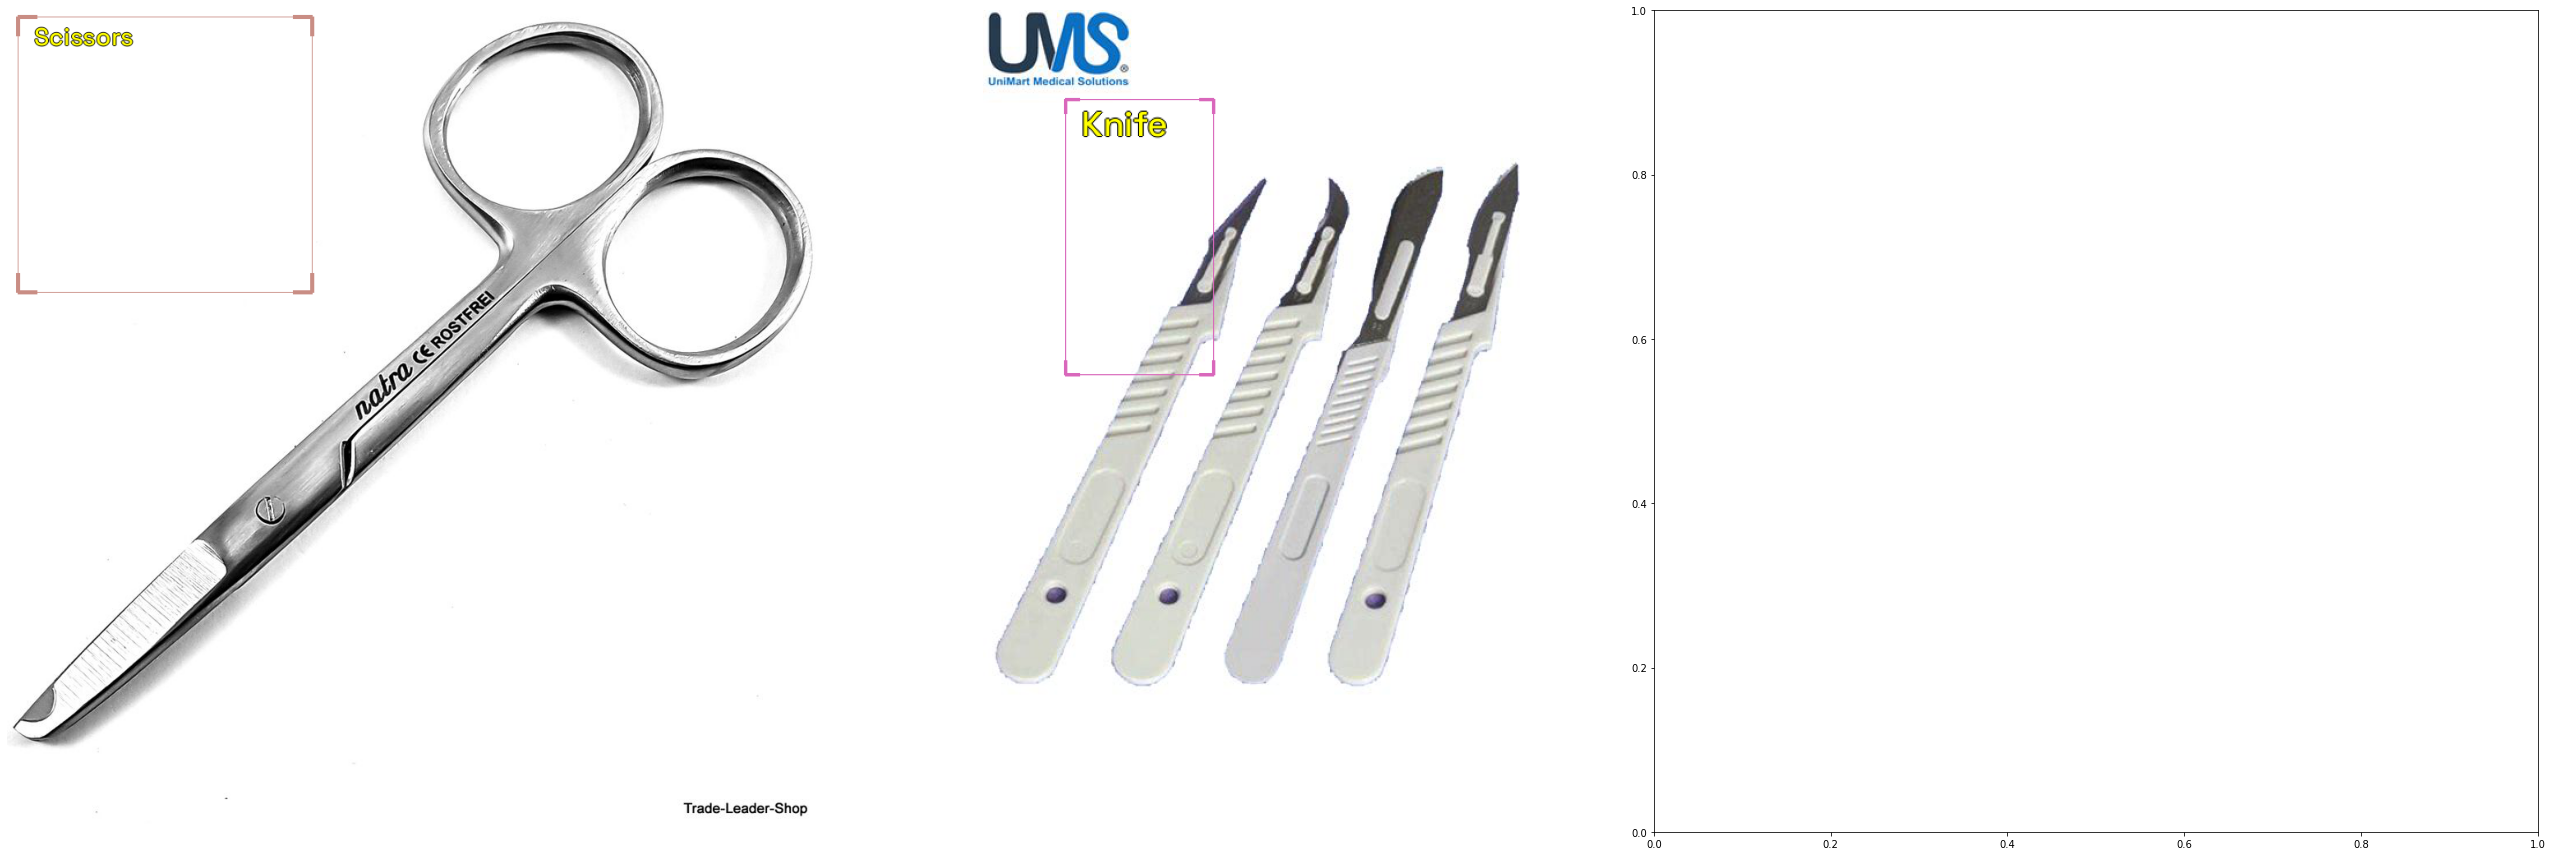

In [279]:
show_records(train_records[3:],ncols=3, font_size=30, label_color = '#ffff00')
## no longer see the multiple scissors

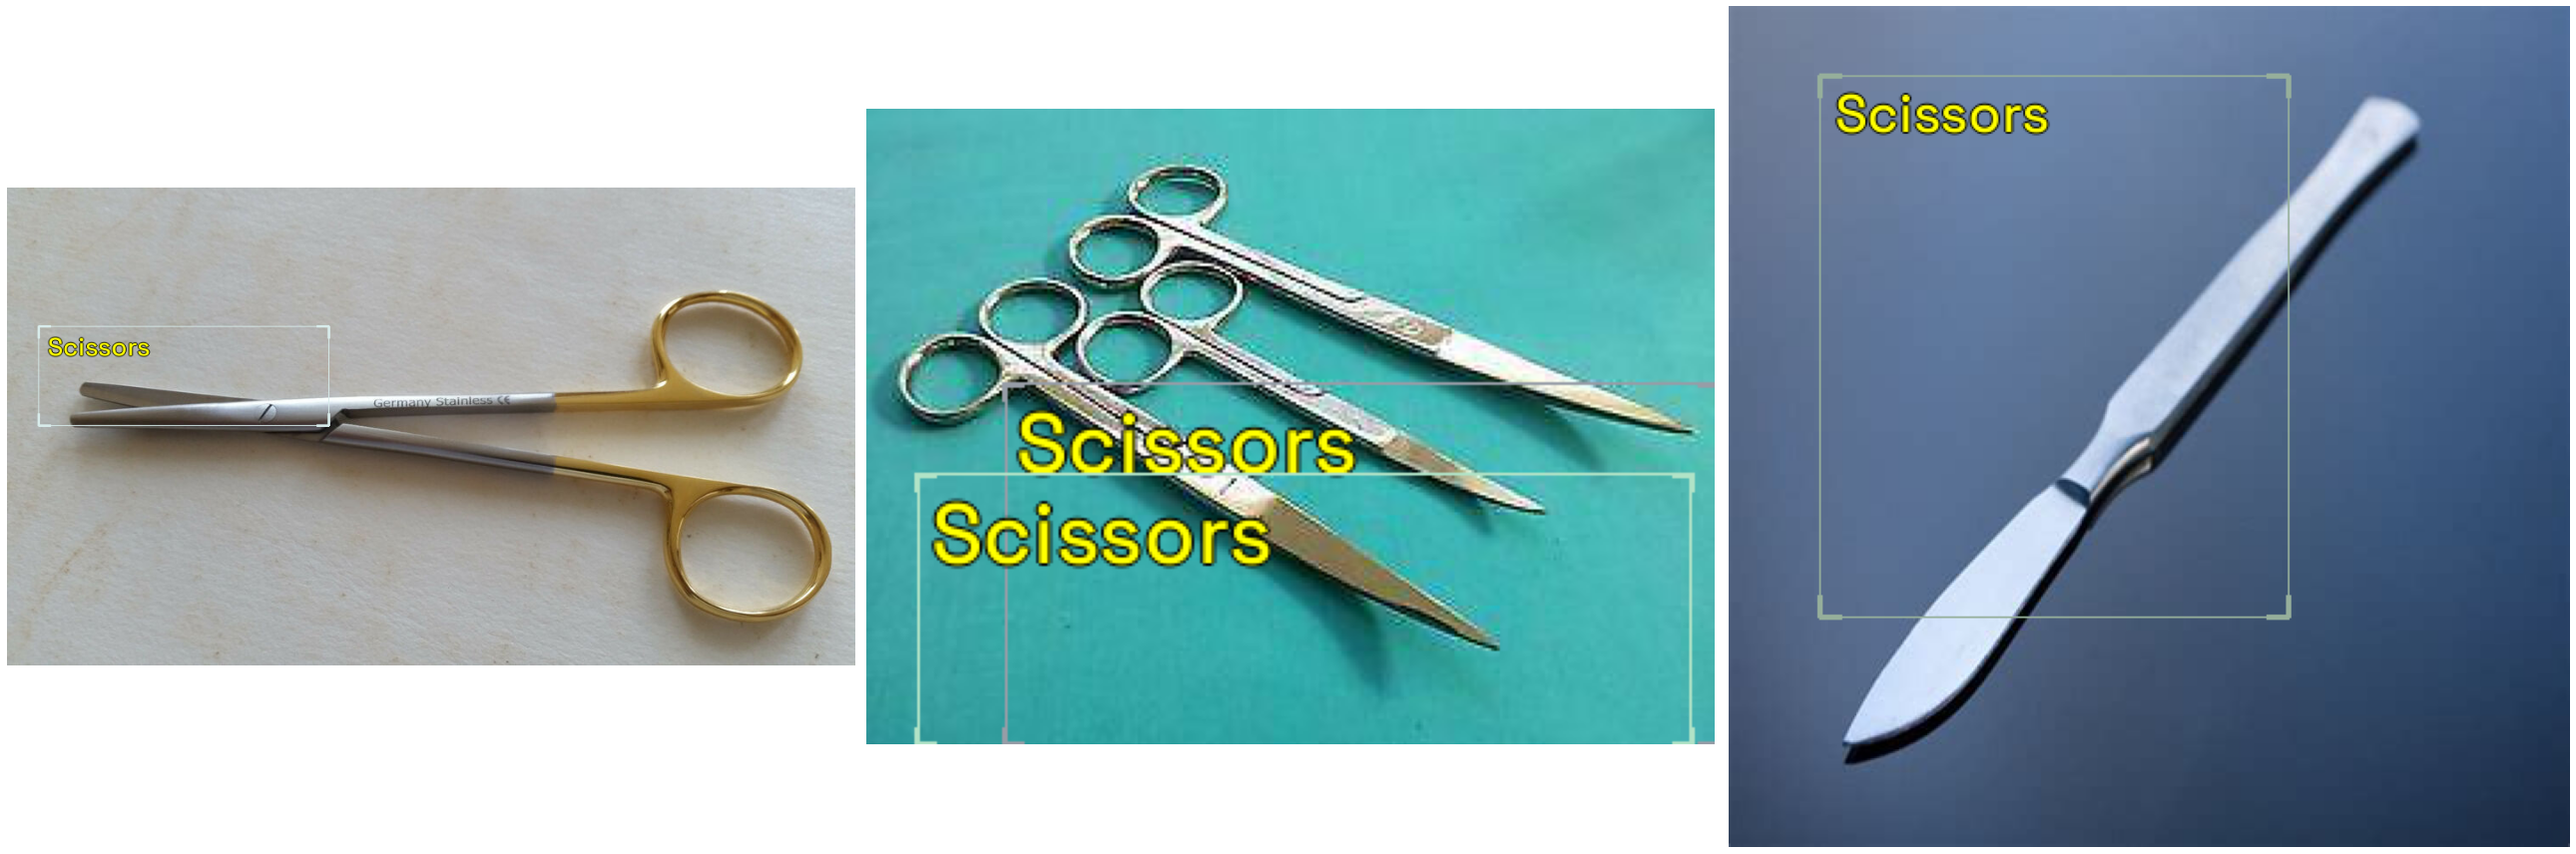

In [280]:
show_records(train_records[:3],ncols=3, font_size=30, label_color = '#ffff00')

In [ ]:
## issue 1
# shifting/ shrinking of bbox

In [264]:
preds_saved[1].pred

BaseRecord

common: 
	- Record ID: 1
	- Image size ImgSize(width=384, height=384)
	- Img: 384x384x3 <np.ndarray> Image
	- Filepath: pilot5/File00007.jpg
	- Img: None
detection: 
	- Class Map: <ClassMap: {'background': 0, 'person': 1, 'bicycle': 2, 'car': 3, 'motorcycle': 4, 'airplane': 5, 'bus': 6, 'train': 7, 'truck': 8, 'boat': 9, 'traffic light': 10, 'fire hydrant': 11, 'stop sign': 12, 'parking meter': 13, 'bench': 14, 'bird': 15, 'cat': 16, 'dog': 17, 'horse': 18, 'sheep': 19, 'cow': 20, 'elephant': 21, 'bear': 22, 'zebra': 23, 'giraffe': 24, 'backpack': 25, 'umbrella': 26, 'handbag': 27, 'tie': 28, 'suitcase': 29, 'frisbee': 30, 'skis': 31, 'snowboard': 32, 'sports ball': 33, 'kite': 34, 'baseball bat': 35, 'baseball glove': 36, 'skateboard': 37, 'surfboard': 38, 'tennis racket': 39, 'bottle': 40, 'wine glass': 41, 'cup': 42, 'fork': 43, 'knife': 44, 'spoon': 45, 'bowl': 46, 'banana': 47, 'apple': 48, 'sandwich': 49, 'orange': 50, 'broccoli': 51, 'carrot': 52, 'hot dog': 53, 'piz

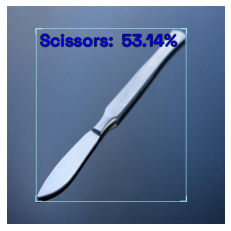

In [270]:
show_sample(preds_saved[1], font_size=30, label_color = '#0000ff')
# 0 throws error TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'
# xmin 51, ymin 39, xmax 315, ymax 344

In [277]:
conv['annotations'][1] # based on preds_saved
# same xmin, ymin, assume w, assume h

{'area': 80640.81,
 'bbox': [51.31749, 39.318893, 264.43347, 304.9569],
 'category_id': 77,
 'id': 2,
 'image_id': 1,
 'iscrowd': 0,
 'score': 0.5314472}

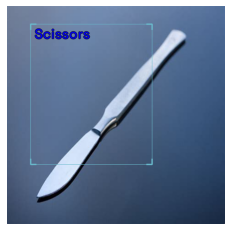

In [284]:
show_record(train_records[2], font_size=30, label_color = '#0000ff')
## bbox being traced as xyxy but using xywh?

In [304]:
class COCOBaseParser(Parser):
    def __init__(
        self,
        annotations_filepath: Union[str, Path],
        img_dir: Union[str, Path],
        idmap: Optional[IDMap] = None,
    ):

        self.annotations_dict = json.loads(Path(annotations_filepath).read_bytes())
        self.img_dir = Path(img_dir)

        self._record_id2info = {o["id"]: o for o in self.annotations_dict["images"]}

        categories = self.annotations_dict["categories"]
        id2class = {o["id"]: o["name"] for o in categories}
        id2class[0] = BACKGROUND
        # coco has non sequential ids, we fill the blanks with `None`, check #668 for more info
        classes = [None for _ in range(max(id2class.keys()) + 1)]
        for i, name in id2class.items():
            classes[i] = name
        self.class_map = ClassMap(classes)

        super().__init__(template_record=self.template_record(), idmap=idmap)

    def __iter__(self):
        yield from self.annotations_dict["annotations"]

    def __len__(self):
        return len(self.annotations_dict["annotations"])

    def template_record(self) -> BaseRecord:
        return BaseRecord(
            (
                FilepathRecordComponent(),
                InstancesLabelsRecordComponent(),
                AreasRecordComponent(),
                IsCrowdsRecordComponent(),
            )
        )

    def prepare(self, o):
        self._info = self._record_id2info[o["image_id"]]

    def record_id(self, o) -> int:
        return o["image_id"]

    def filepath(self, o) -> Path:
        return self.img_dir / self._info["file_name"]

    def img_size(self, o) -> ImgSize:
        return get_img_size(self.filepath(o))

    def labels_ids(self, o) -> List[Hashable]:
        return [o["category_id"]]

    def areas(self, o) -> List[float]:
        return [o["area"]]

    def iscrowds(self, o) -> List[bool]:
        return [o["iscrowd"]]

    def parse_fields(self, o, record, is_new):
        if is_new:
            record.set_filepath(self.filepath(o))
            record.set_img_size(self.img_size(o))

        # TODO: is class_map still a issue here?
        record.detection.set_class_map(self.class_map)
        record.detection.add_labels_by_id(self.labels_ids(o))
        record.detection.add_areas(self.areas(o))
        record.detection.add_iscrowds(self.iscrowds(o))

In [305]:
class COCOBBoxParser(COCOBaseParser):
    def bboxes(self, o) -> List[BBox]:
        #return [BBox.from_xywh(*o["bbox"])]
        return [BBox.from_xywh(*np.fromstring(o.bbox[1:-1],sept=','))]

    def template_record(self) -> BaseRecord:
        record = super().template_record()
        record.add_component(BBoxesRecordComponent())
        return record

    def parse_fields(self, o, record, is_new):
        super().parse_fields(o, record, is_new=is_new)
        record.detection.add_bboxes(self.bboxes(o))

In [306]:
parser = parsers.COCOBBoxParser(
    annotations_filepath = annot,
    img_dir = Path('/content/pilot5/', ##
    mask =False)
)

In [307]:
data_splitter = RandomSplitter([1.0,0])
train_records, valid_records = parser.parse(data_splitter) # default autofix=True


  0%|          | 0/6 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/5 [00:00<?, ?it/s]

AUTOFIX-SUCCESS - (record_id: 4) - Clipping bbox xmax from 318.367436 to image width 300 (Before: <BBox (xmin:49.334106, ymin:97.97958, xmax:318.367436, ymax:240.14508)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 4) - Clipping bbox ymax from 240.14508 to image height 225 (Before: <BBox (xmin:49.334106, ymin:97.97958, xmax:300, ymax:240.14508)>) | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-SUCCESS - (record_id: 4) - Clipping bbox ymax from 287.23337000000004 to image height 225 (Before: <BBox (xmin:18.595291, ymin:129.56949, xmax:291.962721, ymax:287.23337000000004)>) | icevision.utils.logger_utils:autofix_log:17


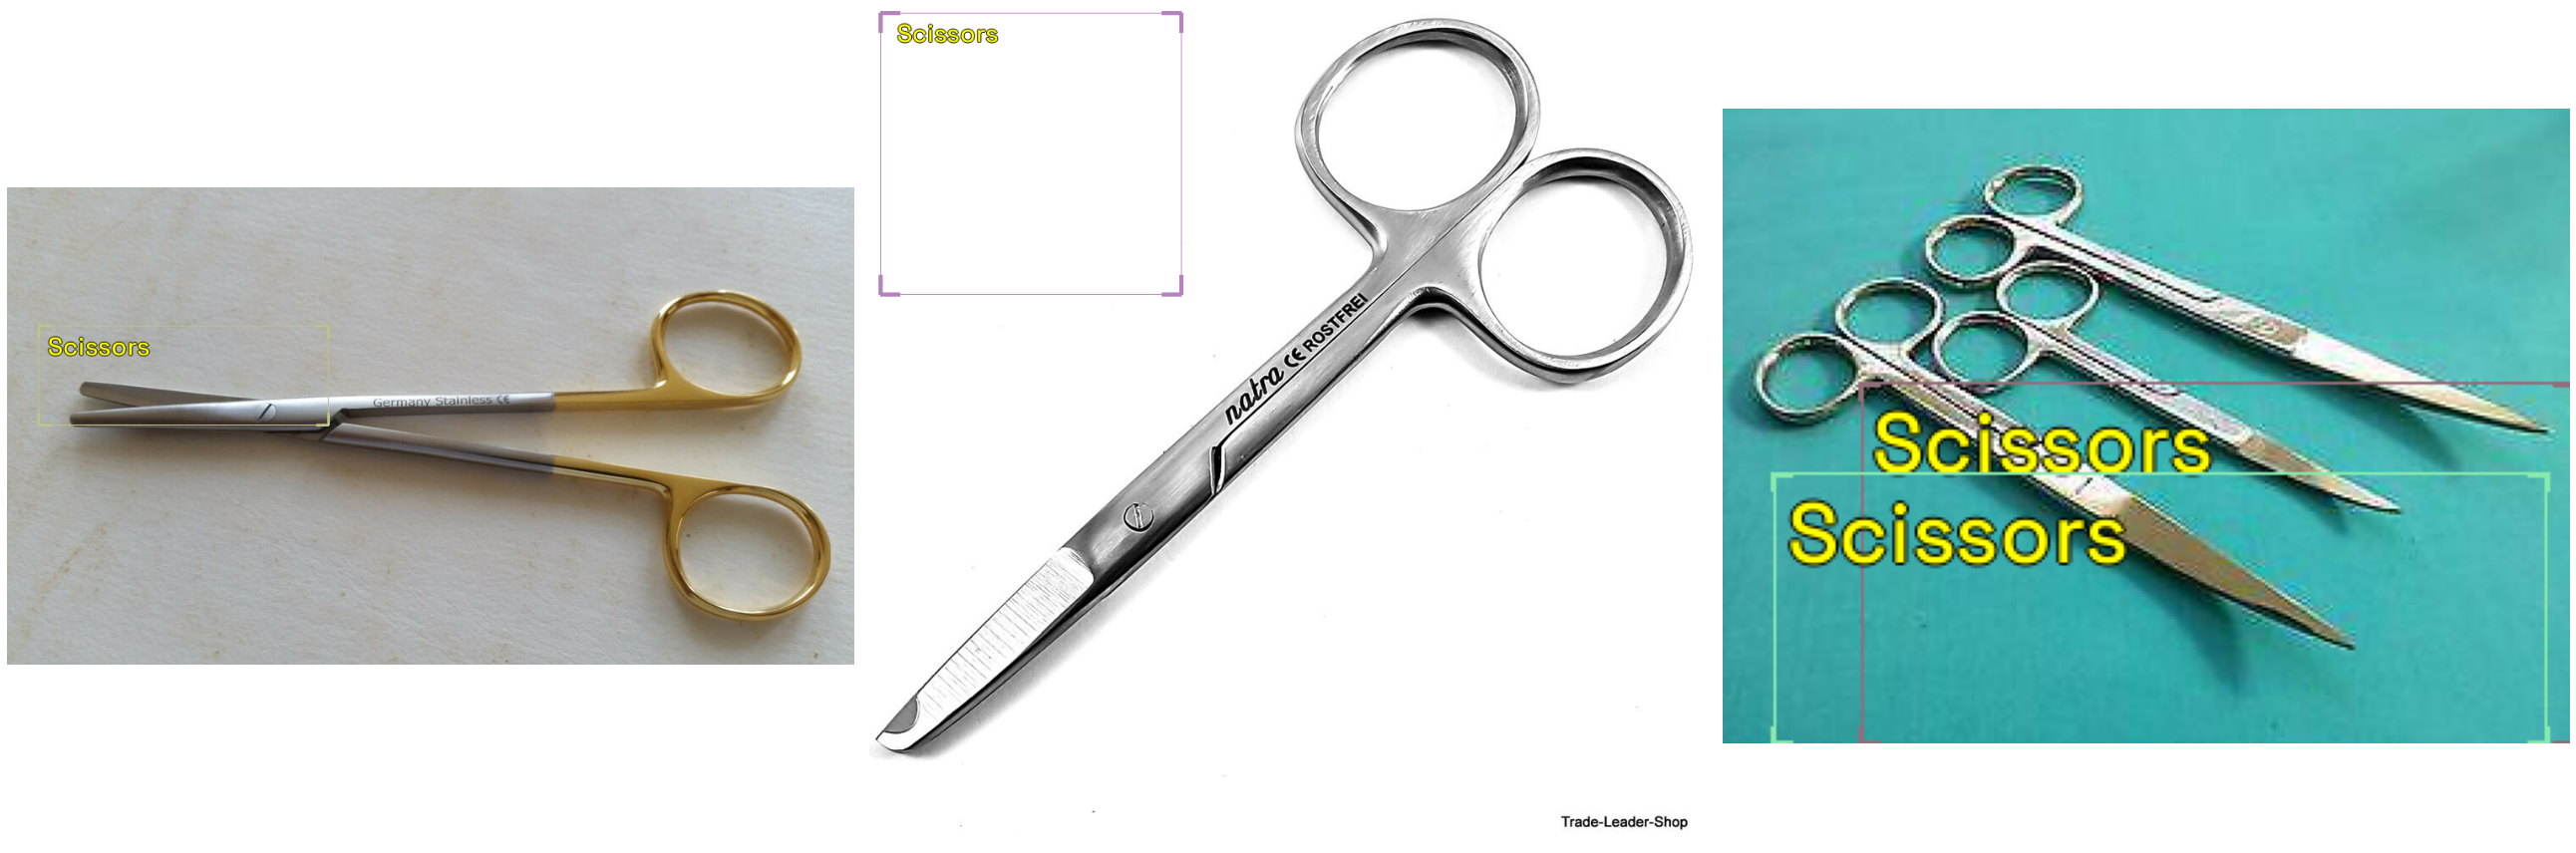

In [308]:
show_records(train_records[:3],ncols=3, font_size=30, label_color = '#ffff00')

In [300]:
data_dir = Path('/content/pilot10')

template_record = ObjectDetectionRecord()

class SurgParser(Parser):
  def __init__(self, template_record, data_dir):
    super().__init__(template_record = template_record)
    self.data_dir = data_dir
    self.annot = Path('/content/pilot10/conv_.json')
    self.class_map = class_map
    self.categories = self.annot['categories']

  def __iter__(self) -> Any:
    for o in self.annot['annotations']:
      yield o
  
  def __len__(self) -> int:
    return len(self.annot)

  def record_id(self, o) -> Hashable:
    return o.image_id

  def parse_fields(self, o, record, is_new):
    if is_new:
      filepath = self.data_dir/ f'{o.image_id}.jpg'
      record.set_filepath(filepath)
      record.set_img_size(ImgSize(width = o.width, height = o.height))
      record.detection.set_class_map(self.class_map)

    record.detection.add_bboxes([BBox.from_xywh(*np.fromstring(o.bbox[1:-1],sept=','))])
    record.detection.add_labels(o.label)

In [301]:
parser = SurgParser(template_record, data_dir)

data_splitter = RandomSplitter([1.0,0])
train_records, valid_records = parser.parse(data_splitter)

TypeError: ignored

In [ ]:
## issue 2
# autofix based on xyxy 
# check effect on xywh

In [ ]:
## issue 3
# unable to get records for image 0

In [ ]:
## with the detection threshold decreased, records now show all images,

In [ ]:
# images and json loaded to roboflow
# annotations adjusted
# generated set
# downloaded using coco json

In [ ]:
## try if with detection threshold 0.5
# more cumbersome to create new bboxes than to adjust
#  --> use det thresh 0.35